# Introduction to Machine Learning

Welcome to this interactive tutorial on **Machine Learning (ML)**. Here, you will learn:
1. What is Machine Learning?
2. The differences between Supervised and Unsupervised Learning.
3. An overview of Reinforcement Learning.
4. Types of ML Algorithms: Regression, Classification, and Clustering.

By the end of this tutorial, you will have a solid understanding of fundamental ML concepts and practical skills for implementing ML algorithms using Python.

---

### Prerequisites
- Basic knowledge of Python programming.
- Familiarity with libraries like `scikit-learn`, `matplotlib`, and `numpy`.

**Let's dive in!**


## 1. What is Machine Learning?

**Machine Learning (ML)** is a subset of Artificial Intelligence (AI) that enables computers to learn patterns from data and make predictions or decisions without explicit programming.

---

### Key Features:
- It is **data-driven**, meaning it relies heavily on the quality and quantity of input data.
- Models improve over time as they learn from new data.

---

### Types of Machine Learning:
1. **Supervised Learning**: Learning from labeled data.
2. **Unsupervised Learning**: Identifying patterns in unlabeled data.
3. **Reinforcement Learning**: Learning by interacting with the environment.

### Real-World Applications:
- Predictive Analytics: Forecasting sales or stock prices.
- Image Recognition: Recognizing faces in photos.
- Natural Language Processing: Powering chatbots like ChatGPT.
- Autonomous Vehicles: Enabling self-driving cars.

---


## 2. Supervised vs. Unsupervised Learning

Machine Learning models can be broadly categorized as:

### 2.1 Supervised Learning
The model learns from **labeled data** where the input features (`X`) and corresponding labels (`y`) are provided.

- Example: Predicting house prices based on square footage (Regression).
- Algorithms: Linear Regression, Logistic Regression, Decision Trees.

---

### 2.2 Unsupervised Learning
The model identifies patterns or groups in **unlabeled data**, without predefined labels.

- Example: Clustering customers based on purchasing behavior.
- Algorithms: KMeans, DBSCAN, Principal Component Analysis (PCA).

---

### Comparison:
| Feature             | Supervised Learning     | Unsupervised Learning  |
|---------------------|-------------------------|-------------------------|
| **Data**            | Labeled (X, y)         | Unlabeled (X only)      |
| **Objective**       | Predict labels         | Identify patterns       |
| **Common Tasks**    | Regression, Classification | Clustering, Dimensionality Reduction |


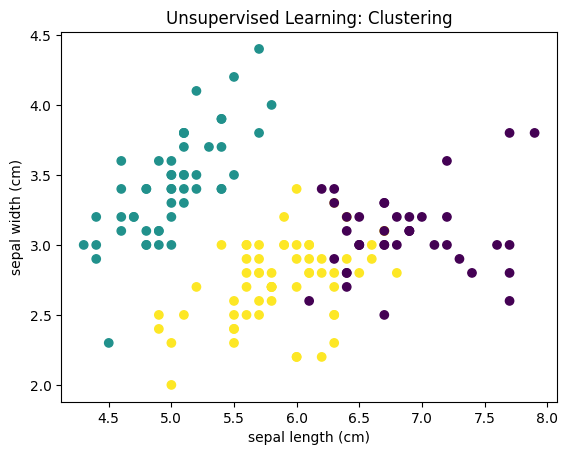

Supervised Learning Accuracy: 1.00
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Supervised Learning Example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
supervised_accuracy = clf.score(X_test, y_test)

# Unsupervised Learning Example
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Visualizing clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Unsupervised Learning: Clustering")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

print(f"Supervised Learning Accuracy: {supervised_accuracy:.2f}")
print(f"Cluster Centers:\n{cluster_centers}")


## 3. Reinforcement Learning Overview

**Reinforcement Learning (RL)** involves an agent learning by interacting with its environment. The agent's goal is to maximize rewards over time.

---

### Key Concepts:
1. **Agent**: The learner or decision-maker.
2. **Environment**: The external system the agent interacts with.
3. **Reward**: Feedback signal for evaluating actions.
4. **Policy**: A strategy defining the agent's actions.

---

### Real-World Applications:
- Gaming: AI that plays chess or Go.
- Robotics: Automated control systems.
- Autonomous Vehicles: Driving decisions based on road conditions.


In [25]:
from stable_baselines3 import PPO
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create the environment with the render_mode set to 'rgb_array' for high-quality video recording
env = gym.make("CartPole-v1", render_mode="rgb_array")  # Use rgb_array for video capture

# Wrap the environment to record the video with improved settings
env = RecordVideo(
    env,
    video_folder="cartpole_high_quality_videos",  # Save videos in this folder
    name_prefix="cartpole_episode",  # Prefix for video files
    step_trigger=lambda step: step % 100 == 0,  # Record every 100 steps
    video_length=500,  # Record up to 500 steps per episode
    fps=30,  # Frames per second for smoother playback
)

# Train the agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Test the trained agent
state, _ = env.reset()
for _ in range(500):  # Increase the length of the test run for better videos
    action, _ = model.predict(state)
    state, reward, terminated, truncated, info = env.step(action)
    
    # Render is not required for video quality but helpful for debugging
    env.render()

    # If the episode ends, reset the environment
    if terminated or truncated:
        state, _ = env.reset()

# Close the environment after testing
env.close()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | 22.9     |
| time/              |          |
|    fps             | 91       |
|    iterations      | 1        |
|    time_elapsed    | 22       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.1        |
|    ep_rew_mean          | 27.1        |
| time/                   |             |
|    fps                  | 80          |
|    iterations           | 2           |
|    time_elapsed         | 50          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008948768 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss   

## Training and Testing an RL Agent in CartPole-v1

This script trains and tests a reinforcement learning agent using the Proximal Policy Optimization (PPO) algorithm in the classic CartPole-v1 environment, where the goal is to balance a pole on a moving cart by applying forces left or right. The agent learns an optimal policy through 10,000 timesteps of training and is evaluated over 500 timesteps during testing. The environment is configured to produce high-quality videos using the `rgb_array` render mode, and videos of the agent's interactions are saved at regular intervals in the `cartpole_high_quality_videos` folder, showcasing the agent's behavior with smooth 30 FPS playback. The purpose is to visualize the agent's learning and performance while validating its ability to maximize rewards by keeping the pole balanced for extended durations.


## 4. Types of Machine Learning Algorithms

### 4.1 Regression
Used for predicting continuous outcomes.

- Example: Predicting house prices.
- Algorithm: Linear Regression.

---

### 4.2 Classification
Used for predicting categorical labels.

- Example: Predicting whether an email is spam.
- Algorithm: Random Forest.

---

### 4.3 Clustering
Used for grouping data into clusters.

- Example: Customer segmentation.
- Algorithm: KMeans Clustering.


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.56


## Linear Regression on the California Housing Dataset

This code demonstrates training a Linear Regression model to predict house prices using the California Housing dataset from scikit-learn. The dataset is split into training and testing sets, with 80% used for training and 20% for testing. The Linear Regression model is trained on the training data, and predictions are made on the test set. The model's performance is evaluated using the Mean Squared Error (MSE) metric, which quantifies the average squared difference between the predicted and actual house prices. This provides a practical application of supervised learning for a real-world regression problem.


In [3]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier

# Classification Example
diabetes = load_diabetes()
X, y = diabetes.data, (diabetes.target > 140).astype(int)

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
print(f"Feature Importance:\n{model.feature_importances_}")


Feature Importance:
[0.07309554 0.02319894 0.18833102 0.11709581 0.07742171 0.08661574
 0.09315214 0.07282051 0.18607014 0.08219846]


## Binary Classification on the Diabetes Dataset

This code trains a Random Forest Classifier on the Diabetes dataset from scikit-learn to predict whether a patient's diabetes progression value exceeds 140. The input features (`X`) include variables such as age, BMI, and blood pressure, while the target (`y`) is converted into a binary classification: 1 if the value is greater than 140, otherwise 0. The trained classifier outputs the feature importance, which indicates the relative contribution of each feature in making predictions. This demonstrates how ensemble learning can be applied for binary classification and feature analysis.


OMP_NUM_THREADS: 2


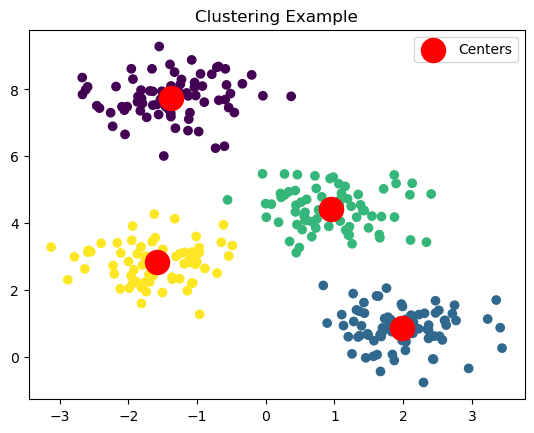

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Set the number of threads to 2

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Verify the environment variable
print(f"OMP_NUM_THREADS: {os.environ.get('OMP_NUM_THREADS')}")

# Clustering Example
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Explicitly set n_init to 10
kmeans.fit(X)

# Plotting Clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centers')
plt.title("Clustering Example")
plt.legend()
plt.show()


## Clustering Example with KMeans

This script demonstrates clustering using the KMeans algorithm on a synthetic dataset generated by `make_blobs`. It begins by limiting the number of threads used by the MKL library with `OMP_NUM_THREADS=2`, addressing potential performance issues on Windows. A warning about MKL-related memory leaks is suppressed using `warnings.filterwarnings`. The synthetic dataset contains 300 points distributed into 4 clusters, created with some variability using `make_blobs`. The KMeans algorithm is applied with 4 clusters (`n_clusters=4`) and initialized 10 times (`n_init=10`) for consistent results. Finally, the data points are visualized with Matplotlib, coloring each point by its cluster and marking the cluster centers in red.
